In [1]:
import Main
from Analyser import *

In [2]:
modelName = 'Ruler2'

In [3]:
# Some PyABC magic to get our set of parameters
from pyabc import (ABCSMC, Distribution, RV, MultivariateNormalTransition)
import scipy as sp
import scipy.stats as st
import tempfile
import os
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def model(params):
    return Main.generate_and_analyse(modelName, params)

In [5]:
def sigfigs(n):
    print('%.2f'%n,end='')

In [6]:
sigfigs(1.005)
sigfigs(1.005)

1.001.00

In [7]:
deref = {
    'rule_1_0' : 1,
    'rule_1_1' : 0,
}
deref_metrics = Main.generate_and_analyse("Ruler2",deref)

In [40]:
three_prong = {
    'rule_1_0' : 0,
    'rule_1_1' : 1,
    'general_thickness': 0.39,
    'section_1_h' : 21
}
three_prong_metrics = Main.generate_and_analyse("Ruler2",three_prong)

In [42]:
for (k,v) in deref_metrics.items():
    v2 = three_prong_metrics[k]
    if k[-3:] != 'xyz':
        diff = v - v2
        print(k.ljust(30) + '\t',end='')
        sigfigs(v)
        print('\t',end='')
        sigfigs(v2)
        print('\t',end='')
        sigfigs(diff)
        print()
    else:
        diff = (v[0]-v2[0],v[1]-v2[1],v[2]-v2[2])
        print(k.ljust(30) + '\t',end='')
        
        print('(',end='')
        for i in range(3):
            sigfigs(v[i])
            print(',',end='')
        print(')',end='')
        
        print('\t',end='')
        
        print('(',end='')
        for i in range(3):
            sigfigs(v2[i])
            print(',',end='')
        print(')',end='')
        
        print('\t',end='')
        
        print('(',end='')
        for i in range(3):
            sigfigs(diff[i])
            print(',',end='')
        print(')',end='')   
        
        print()

parentAngle_mean              	23.96	19.95	4.02
parentAngle_variance          	19.60	1.05	18.56
length_mean                   	3.98	7.44	-3.47
length_variance               	1.17	2.09	-0.92
verticalOrientation_mean      	66.62	36.33	30.29
verticalOrientation_variance  	32.99	18.24	14.75
horizontalOrientation_mean    	165.18	183.70	-18.52
horizontalOrientation_variance	101.90	109.21	-7.31
q1_xyz                        	(30.48,25.47,35.73,)	(0.78,21.76,0.78,)	(29.70,3.71,34.95,)
q2_xyz                        	(87.92,25.35,105.99,)	(26.01,12.47,20.45,)	(61.90,12.88,85.55,)
q3_xyz                        	(89.10,27.17,90.28,)	(68.10,26.87,60.42,)	(21.00,0.30,29.86,)
xyz                           	(92.49,77.42,105.99,)	(68.10,76.98,60.42,)	(24.38,0.45,45.57,)
trunk_length                  	10.00	21.00	-11.00
totalBiomass                  	791.45	798.65	-7.20


In [47]:
# We have two models that are similar in every regard other than their branching structure
# We want to try and infer the rule probabilities
# We first normalise the height and biomass produced by changing the thickness and growth height of the two models, since without doing this the optimizer would just pick the rule that produced biomass as opposed to picking the rule that best fit structure

In [59]:
metrics = {
    'general_thickness': (0.35, 0.55),
    'section_1_h' : (5, 30),
    'rule_1_0': (0,1),
    'rule_1_1': (0,1),
}

In [60]:
prior = Distribution(rule_1_0            =RV("uniform", 0, 1),
                     rule_1_1            =RV("uniform", 0, 1),
                     general_thickness   =RV("uniform", 0.35, 0.55),
                     section_1_h         =RV("uniform", 5, 30),
                    )

In [61]:
target_metrics = Main.generate_and_analyse('rules_test_1', {})

In [9]:
abc = ABCSMC(model, prior, distance)

In [10]:
db_path = ("sqlite:///" + os.path.join(tempfile.gettempdir(), "test.db"))

In [12]:
abc.new(db_path, target_metrics)

INFO:History:Start <ABCSMC(id=6, start_time=2019-04-16 10:32:56.912896, end_time=None)>
Process Process-1:
Process Process-2:
Traceback (most recent call last):
  File "/home/t/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/t/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Process Process-3:
  File "/home/t/anaconda3/lib/python3.7/site-packages/pyabc/sampler/multicore_evaluation_parallel.py", line 24, in work
    new_sim = simulate_one()
  File "/home/t/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/t/anaconda3/lib/python3.7/site-packages/pyabc/smc.py", line 453, in simulate_one
    t, theta, summary_statistics)
Traceback (most recent call last):
Process Process-4:
  File "/home/t/anaconda3/lib/python3.7/site-packages/pyabc/model.py", line 116, in summary_statistics
   

  File "/home/t/anaconda3/lib/python3.7/site-packages/pyabc/model.py", line 116, in summary_statistics
    raw_data = self.sample(pars)
IndexError: list index out of range
  File "/home/t/anaconda3/lib/python3.7/site-packages/pyabc/model.py", line 261, in sample
    return self.sample_function(pars)
  File "<ipython-input-4-fe8d3e4dfdf6>", line 2, in model
    return Main.generate_and_analyse(modelName, params)
  File "/home/t/Documents/diss/CompiledApproach/treeMod8000/App/Models/Main.py", line 107, in generate_and_analyse
    tree_data = generate_model(filename, overrideParams, return_analysis=True)
  File "/home/t/Documents/diss/CompiledApproach/treeMod8000/App/Models/Main.py", line 6, in generate_model
    Specification   = Parser.parse('Specifications/'+filename+'.txt', overrideParams)
  File "/home/t/Documents/diss/CompiledApproach/treeMod8000/App/Models/Parser.py", line 208, in parse
    Specification['sections'][agent]['rules'][int(id)][1] = [v]
IndexError: list index out of ra

KeyboardInterrupt: 

In [ ]:
history = abc.run(minimum_epsilon=0.1, max_nr_populations=10)

In [ ]:
# Visualise results
from pyabc.visualization import plot_kde_1d
for (k,v) in metrics.items():
    fig, ax = plt.subplots()
    for t in range(history.max_t, history.max_t+1):
        df, w = history.get_distribution(m=0, t=t)
        plot_kde_1d(df, w,
                    xmin=v[0], xmax=v[1],
                    x=k, ax=ax,
                    label="PDF t={}".format(t))
    ax.legend();

In [ ]:
# Fitting the other one

In [61]:
target_metrics = Main.generate_and_analyse('rules_test_2', {})

In [9]:
abc = ABCSMC(model, prior, distance)

In [10]:
db_path = ("sqlite:///" + os.path.join(tempfile.gettempdir(), "test.db"))

In [12]:
abc.new(db_path, target_metrics)

INFO:History:Start <ABCSMC(id=6, start_time=2019-04-16 10:32:56.912896, end_time=None)>
Process Process-1:
Process Process-2:
Traceback (most recent call last):
  File "/home/t/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/t/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Process Process-3:
  File "/home/t/anaconda3/lib/python3.7/site-packages/pyabc/sampler/multicore_evaluation_parallel.py", line 24, in work
    new_sim = simulate_one()
  File "/home/t/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/t/anaconda3/lib/python3.7/site-packages/pyabc/smc.py", line 453, in simulate_one
    t, theta, summary_statistics)
Traceback (most recent call last):
Process Process-4:
  File "/home/t/anaconda3/lib/python3.7/site-packages/pyabc/model.py", line 116, in summary_statistics
   

  File "/home/t/anaconda3/lib/python3.7/site-packages/pyabc/model.py", line 116, in summary_statistics
    raw_data = self.sample(pars)
IndexError: list index out of range
  File "/home/t/anaconda3/lib/python3.7/site-packages/pyabc/model.py", line 261, in sample
    return self.sample_function(pars)
  File "<ipython-input-4-fe8d3e4dfdf6>", line 2, in model
    return Main.generate_and_analyse(modelName, params)
  File "/home/t/Documents/diss/CompiledApproach/treeMod8000/App/Models/Main.py", line 107, in generate_and_analyse
    tree_data = generate_model(filename, overrideParams, return_analysis=True)
  File "/home/t/Documents/diss/CompiledApproach/treeMod8000/App/Models/Main.py", line 6, in generate_model
    Specification   = Parser.parse('Specifications/'+filename+'.txt', overrideParams)
  File "/home/t/Documents/diss/CompiledApproach/treeMod8000/App/Models/Parser.py", line 208, in parse
    Specification['sections'][agent]['rules'][int(id)][1] = [v]
IndexError: list index out of ra

KeyboardInterrupt: 

In [ ]:
history = abc.run(minimum_epsilon=0.1, max_nr_populations=10)

NameError: name 'history' is not defined

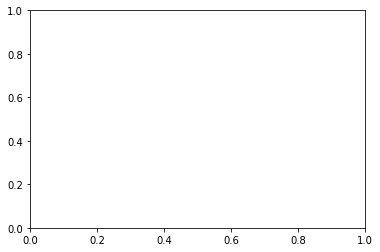

In [62]:
# Visualise results
from pyabc.visualization import plot_kde_1d
for (k,v) in metrics.items():
    fig, ax = plt.subplots()
    for t in range(history.max_t, history.max_t+1):
        df, w = history.get_distribution(m=0, t=t)
        plot_kde_1d(df, w,
                    xmin=v[0], xmax=v[1],
                    x=k, ax=ax,
                    label="PDF t={}".format(t))
    ax.legend();